In [1]:
from obspy import read
import numpy as np
import pandas as pd
from os.path import join, basename
from glob import glob
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
ac_calib = 8.2928e-05

In [3]:
in_dir = '../../data/banner/infrasound/processed/'
# l = os.listdir(in_dir)
l = glob(os.path.join(in_dir, 'c0be4*'))
r = []
for i in l:
    i = os.path.basename(i)
    j = i[5:11]
    if j not in r:
        r.append(j)
r.sort()

In [6]:
name_dic = {'be4':'lower','a3m':'upper','ad8':'failed array'}
height_dic = {'lower-p0':0.33,'lower-p1':0.66,'lower-p2':1,'upper-p0':1.33,'upper-p1':np.nan,'upper-p2':2}
full_res = {}
for i, day in tqdm(enumerate(r), desc = 'days'):
    # if i == 65:
        ls = glob(join(in_dir, '*'+day+'*'))
        # print(ls)
        res = {}
        for file in ls:
                name = name_dic[basename(file).replace(day,'')[2:5]]
                if name != 'failed array':
                    tr = read(file)[0]
                    stats = tr.stats
                    sps = stats['sampling_rate']
                    start = stats['starttime']
                    end = stats['endtime']
                    channel = stats['channel']
                    name_channel = f'{name}-{channel}'
                    height = height_dic[name_channel]
                    if not np.isnan(height):
                        arr = tr.data
                        arr = arr * ac_calib
                        power = arr**2
                        energy = np.cumsum(power)[-1]
                        res[height] = energy
        
        full_res[day] = res       
                
                


days: 75it [01:02,  1.19it/s]


In [11]:
df = pd.DataFrame()
for day,v in full_res.items():
    for height,energy in v.items():
        df.loc[day,height] = energy

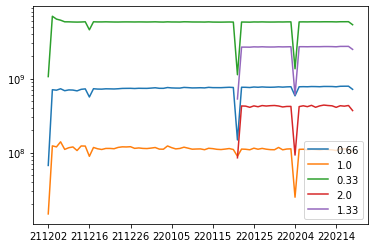

In [14]:
df.plot()
plt.yscale('log')